<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시나리오
- 럭키백을 패션분야에 접목시킬려고 함
- 상품갯수 증가 및 일반 잡화용제공

# 케라스(keras) : input, target
- 여러 샘플데이터를 가지고 올수 있는 것
- 샘플데이터 예
    - MNIST 데이터 셋 : 손으로 쓴 0~9까지의 숫자로 이루어져 있음
    - 패션 MNIST 데이터 셋 : 숫자대신 패션 아이템으로 이루어짐

In [27]:
import tensorflow as tf #텐서플로

# 실행마다 동일한 결과를 얻기 위해 케라스에 random_seed(랜덤시드)를 사용
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism() #파이참이나 다른 곳에 버전오류 해결용

# 케라스 패키지 import
from tensorflow import keras

#load_data()가 훈련세트와 테스트세트로 데이터를 나누어 반환(input, target의 쌍으로 이룸)
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 데이터 확인

In [28]:
# 전달받은 데이터의 크기 확인 return값 : 튜블
print("train : ",train_input.shape, train_target.shape)
print("test  : ",test_input.shape, test_target.shape)
# 훈련용 : 샘플_60,000개, 해상도 28*28
# 테스트 : 샘플_10,000개, 해상도 28*28 => 1차원배열

train :  (60000, 28, 28) (60000,)
test  :  (10000, 28, 28) (10000,)


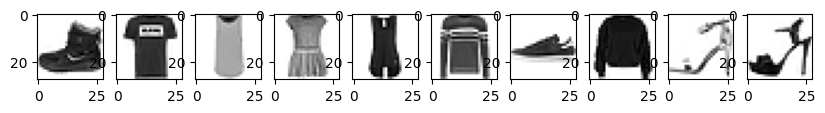

In [29]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('on')
plt.show()

In [30]:
print([train_target[i] for i in range(10)]) # 샘플 target 확인
# [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

# 0~9까지 target이 있음
# 0티셔츠 1바지 2스웨터 3드레스 4코드 5샌달 6셔츠 7스니커즈 8가방 9앵클부츠

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FXedId%2FbtsKEJdTBol%2FqgnokYOGHfhRyj2DC39KR1%2Fimg.png">

In [31]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


# 확률적 경사 하강법(SGDClassifier) : 분류
- 표준화 전처리된 데이터를 사용
- 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동
- 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실함수의 경사를 내려 올수 없음

In [32]:
#로지스틱회귀로 훈련
# 6만개 전체를 한번에 훈련하는 것보다 샘플 1개씩 꺼내서 모델을 훈련해보자

# 패션 MNIST의 경우 흑백이기에 0~255사이의 정수값을 가짐
# -> 255로 나누어 0~1사이값으로 정규화 진행(양수값으로 이루어진 이미지 전처리용)

# reshape로 2차원 배열을 1차원 배열로 펼침
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28) # -1 : 모든 값이용
print(train_scaled.shape)
# SGDClassifier는 2차원 지원 안함 28*28 = 784

(60000, 784)


In [33]:
from sklearn.model_selection import cross_validate #크로스검증
from sklearn.linear_model import SGDClassifier      # 경사하강법

sc = SGDClassifier(loss = 'log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print("test  : ", np.mean(scores['test_score']))

test  :  0.8194166666666666


로지스틱 회귀
- z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f

선형방정식
- z_티셔츠 = a * (픽셀1) + b * (픽셀2) + c * (픽셀3) + d * (픽셀4) + ... + e * (픽셀784)  + f(절편)

바지에 대한 출력은 티셔트와 다른 값을 사용해야 함(티셔츠와 다름)
- z_바지 = a1 * (픽셀1) + b1 * (픽셀2) + c1 * (픽셀3) + d1 * (픽셀4) +... + e1 * (픽셀784)  + f(절편)


나머지 클래스에 대한 선형 방정식도 동일 -> 10개의 클래스에 대한 선형 방정식을 모두 계산함

다음 단계인 소프트맥스 함수를 통과하여 각 클래스에 대한 확률을 얻을 수 있음

# [인공신경망(artificial neural network, ANN)](https://todayisbetterthanyesterday.tistory.com/41)
- 아티피셜 뉴럴 네트워크

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdTJqW8%2FbtqFWBsCSMY%2FlvkyxLI3WZ4pd6ttRtDQK1%2Fimg.png">

- 출력층(output Layer)
    - 신경망의 최종값
    - z_티셔츠 ~ 클래스 10개인 z_10까지 계산하고 이를 바탕으로 클래스를 예측하기 때문에

- 뉴런(Neuron)
    - 인공신경망의 z값 계산하는 단위 -> 선형계산을 진행(대부분 유닛이라고 부름)
    - 사람 뇌의 신경단위와 다른 것(무언가를 만들어내는 것이 아니라 알고리즘의 일종)

- 입력층(input Layer)
    - 픽셀 1~ 784번 픽셀까지

z_1를 만들기 위해 픽셀 1인 x_1에 곱해지는 가중치는 w_1, 1.....10개의 뉴런

확률적 경사 하강법을 사용한 로지스틱 회귀모델이 가장 간단한 인공신경망이라면 인공신경망을 만들어도 성능이 좋아지지 않는다.

이미 인공신경망을 만들었다.
확률적 경사 하강법을 사용한 로지스칙 회귀는 가장 간단한 인공 신경망 모델이다.

<img src ="https://velog.velcdn.com/images/yoonsnee_0303/post/e2593ebe-d9ac-4e03-b8f0-e85e2ea2a34a/image.png" width=500px>

## 텐서플로(TensorFlow)
- 딥러닝 라이브러리에서 인기가 높음
- 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리
- 텐서플로우 2.x 버전이 2019년 9월에 릴리스 됨

- 딥러닝 라이브러리
    - GPU(그래픽카드)사용하여 인공신경망을 훈련
    - GPU는 벡터와 행렬 연산으로 3D연산에 최적화 되어 있음
        - 곱셈과 덧셈이 많이 수행되는 인공 신경망에 속도를 높여준다.
- 케라스 라이브러리
    - 직접 GPU연산을 수행하지 않음
    - 대신 GPU연산을 수행하는 다른 라이브러리를 백엔드로 사용
    - 멀티-백엔드 케라스 : 텐서플로가 케라스 백엔드로 사용할수 있음
    - 케라스 API만 익히면 다양한 딥러닝 라이브러리를 입맛대로 골라서 사용할 수 있다.(직관적이고 사용하기 편함)

In [34]:
import tensorflow as tf

from tensorflow import keras # 케라스 : 고수준 api

## 인공신경망 모델만들기
- train_scaled, train_target 사용
- 인공신경망에서는 교차 검증을 사용하지 않고 검증세트를 별도로 덜어내어 사용
    - 이유1 : 딥러닝 분야의 데이터 셋은 출분히 크기 때문에 검증 점수가 안정적
    - 이유2 : 교차 검증을 수행하기에는 훈련시간이 너무 오래 걸림
    
    => pit시간이 몇시간, 며칠이 걸릴 수 있음

In [35]:
# 변수명이 같기때문에 중복 실행이 안되도록 주의!!
from sklearn.model_selection import train_test_split

#train, val_scaled = 80,20
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print("train     : ", train_scaled.shape, train_target.shape)   # 훈련세트 : 48,000 +
print("val(검증) : ",val_scaled.shape, val_target.shape)        # 검증세트 : 12,000 = 600000

train     :  (48000, 784) (48000,)
val(검증) :  (12000, 784) (12000,)


- 딥러닝에서는 다양한 종류의 층을 추가하는 식으로 모델을 만듬
- 종류 : 밀집층(Dense layer), 완전연결층(fully connected layer)

- 입력데이터
    - 10개의 유닛
    - 활성화 함수(activation=) : 뉴런의 선형방정식계산함수
        - 다중 분류: 소프트맥스(softmax)

            ex) 현데이터 : 입력값은 784개의 원소로 이루어진 1차원 배열
        - 2진분류 : 시그모이드 함수(sigmoid)
- 입력층
    - 케라스는 첫번째 층에 입력 크기를 넣어야 합니다.(이후 층추가는 자동 계산)
        - 그다음에 추가되는 층은 자동으로 계산되기 때문에 넣을 필요 없음
    - 케라스 모델은 Sequential 클래스로 만듬

- 출력층
    - 인공신경망의 오른쪽에 높은 층을 만듬
    - 10개의 패션 아이템을 분류하기 위해서 10개의 뉴런으로 구성
    - 케라스의 레이어 패키지 안에는 다양한 층이 존재
        - 가장 기본이 되는 층이 밀집층(dense layer)
        
        ex) 784개의 픽셀과 10개의 뉴런이 모두 연결된 선이라는 뜻
        - 완전 연결층(fully connected layer) : 이런 층을 뉴런이 모두 연결

<img src= "https://velog.velcdn.com/images%2Foooops%2Fpost%2Fd0411191-b9a6-4aea-ac40-d25a5d58b595%2Fimage.png" width = 400px>

In [36]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
#                       뉴런갯수      적용함수          입력의 크기
# 입력의 크기는 10개의 뉴런이 각각 몇개의 입력을 받는지 튜블로 지정함

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### .Sequential()
- 순차적구조
- 밀집층을 가진 신경망 모델을 만듬
- 객체를 만들 때 앞에서 만든 밀집층의 객체 dense를 전달함
- 여기서 만든 model 객체가 바로 신경망 모델

In [37]:
#밀집층을 가진 신경망 모델 생성
model = keras.Sequential([dense])

### .compile()
- 케라스 모델 훈련전 설정 단계
- 손실함수(loss)
    - 히스 다중분류 : 정수타깃_sparse_categorical_crossentropy
    - 히스 이진분류 : 이진타깃_sparse_binary_crossentropy
- 측정값(metrics)
    - ['accuracy'] : 정확도(에큐러시)의 지표가 됨(추가로 정확도를 기록하기 위해)
        - 케라스는 자동으로 에포크마다 손실을 기록

<img src="https://velog.velcdn.com/images%2Foooops%2Fpost%2F3291c5c0-0cd4-4d21-8435-c7a17da3f56f%2Fimage.png">

In [38]:
#인공신경망으로 패션 아이템 분류
model.compile(loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
# 정수형으로 target 생성되어 있음 -> 원핫 인코딩
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


## 훈련

In [40]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7370 - loss: 0.7853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8346 - loss: 0.4845
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8452 - loss: 0.4564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8504 - loss: 0.4425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8537 - loss: 0.4337


In [ ]:
"""
결과

Epoch 1/5 : accuracy: 0.7370 - loss: 0.7853
Epoch 2/5 : accuracy: 0.8346 - loss: 0.4845
Epoch 3/5 : accuracy: 0.8452 - loss: 0.4564
Epoch 4/5 : accuracy: 0.8504 - loss: 0.4425
Epoch 5/5 : accuracy: 0.8537 - loss: 0.4337

accuracy(정확도)는 여기서 크게 올라가지 않을 것이다.
에포크마다 걸린 시간, 정확도, 손실
"""

## 훈련평사 : .evaluate()
- 케라스 모델의 성능평가하는 메서드

In [42]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8462 - loss: 0.4364


[0.4444445073604584, 0.8458333611488342]

In [ ]:
"""
결과

Epoch 1/5 : accuracy: 0.7370 - loss: 0.7853
Epoch 2/5 : accuracy: 0.8346 - loss: 0.4845
Epoch 3/5 : accuracy: 0.8452 - loss: 0.4564
Epoch 4/5 : accuracy: 0.8504 - loss: 0.4425
Epoch 5/5 : accuracy: 0.8537 - loss: 0.4337

test :                0.8458
"""

# 사이킷런 과 케라스 모델 비교
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FE85sF%2FbtsKEvGQBVr%2FkY54oWyCA3ji0UOjWjcGVk%2Fimg.png">